In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 20)

In [7]:
df.iloc[488]['TotalCharges']

' '

In [8]:
df1 =df[df.TotalCharges!=' ']

In [9]:
df.shape

(7043, 20)

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1['TotalCharges'].unique

<bound method Series.unique of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7032, dtype: object>

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2232\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [13]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

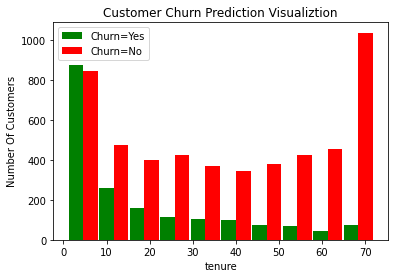

In [14]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

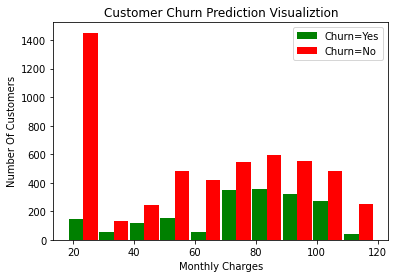

In [15]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
columns =df1.columns
columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2232\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2232\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [19]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2232\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2232\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [23]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [24]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6957,0,0,0,0,9,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1272,0,0,1,1,5,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2995,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2342,1,0,0,0,30,1,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1515,1,0,0,0,41,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [26]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [27]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [28]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [29]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [30]:
X_train.shape

(5625, 26)

In [31]:
X_test.shape


(1407, 26)

In [32]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [33]:
len(X_train.columns)

26

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 911us/step - loss: 0.4838 - accuracy: 0.7634
Epoch 2/100
176/176 [==============================] - 0s 846us/step - loss: 0.4220 - accuracy: 0.7993
Epoch 3/100
176/176 [==============================] - 0s 855us/step - loss: 0.4171 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8055
Epoch 5/100
176/176 [==============================] - 0s 933us/step - loss: 0.4106 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 873us/step - loss: 0.4075 - accuracy: 0.8100
Epoch 7/100
176/176 [==============================] - 0s 957us/step - loss: 0.4066 - accuracy: 0.8094
Epoch 8/100
176/176 [==============================] - 0s 963us/step - loss: 0.4041 - accuracy: 0.8121
Epoch 9/100
176/176 [==============================] - 0s 968us/step - loss: 0.4042 - accuracy: 0.8130
Epoch 10/100
176/176 [==============================] - 0s 959us/step - los

Epoch 80/100
176/176 [==============================] - 0s 830us/step - loss: 0.3536 - accuracy: 0.8356
Epoch 81/100
176/176 [==============================] - 0s 820us/step - loss: 0.3537 - accuracy: 0.8341
Epoch 82/100
176/176 [==============================] - 0s 993us/step - loss: 0.3532 - accuracy: 0.8340
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8363
Epoch 84/100
176/176 [==============================] - 0s 994us/step - loss: 0.3523 - accuracy: 0.8375
Epoch 85/100
176/176 [==============================] - 0s 975us/step - loss: 0.3508 - accuracy: 0.8347
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.8338
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8354
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8366
Epoch 89/100
176/176 [==============================] - 0s 999us/step - 

In [40]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 869us/step - loss: 0.5079 - accuracy: 0.7676


[0.5079261660575867, 0.7675906419754028]

In [41]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 729us/step


array([[0.08927492],
       [0.4820942 ],
       [0.00091326],
       [0.7688254 ],
       [0.37510157]], dtype=float32)

In [42]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
y_pred[:10]


[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       999
           1       0.63      0.50      0.55       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

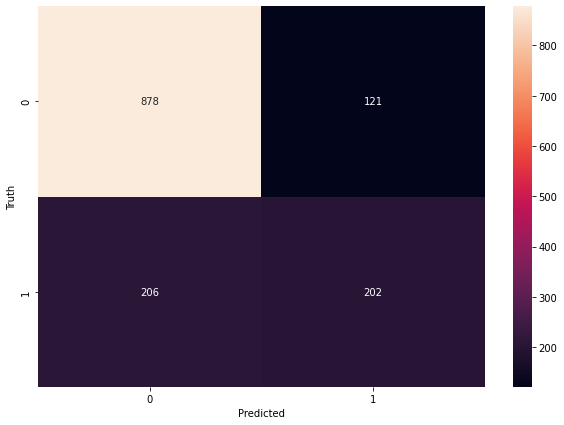

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
y_test.shape

(1407,)

In [47]:
round((862+229)/(862+229+137+179),2)

0.78

In [48]:
round(862/(862+179),2)

0.83

In [49]:
round(229/(229+137),2)

0.63

In [50]:
round(862/(862+137),2)

0.86

In [51]:
round(229/(229+179),2)

0.56

# handling imbalanced data


In [52]:
from tensorflow_addons import losses


In [53]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [54]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
176/176 [==============================] - 1s 996us/step - loss: 0.4991 - accuracy: 0.7611
Epoch 2/100
176/176 [==============================] - 0s 941us/step - loss: 0.4240 - accuracy: 0.7975
Epoch 3/100
176/176 [==============================] - 0s 919us/step - loss: 0.4159 - accuracy: 0.8032
Epoch 4/100
176/176 [==============================] - 0s 949us/step - loss: 0.4122 - accuracy: 0.8062
Epoch 5/100
176/176 [==============================] - 0s 932us/step - loss: 0.4099 - accuracy: 0.8105
Epoch 6/100
176/176 [==============================] - 0s 949us/step - loss: 0.4100 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 943us/step - loss: 0.4074 - accuracy: 0.8132
Epoch 8/100
176/176 [==============================] - 0s 941us/step - loss: 0.4060 - accuracy: 0.8128
Epoch 9/100
176/176 [==============================] - 0s 976us/step - loss: 0.4038 - accuracy: 0.8126
Epoch 10/100
176/176 [==============================] - 0s 889us/step - l

176/176 [==============================] - 0s 842us/step - loss: 0.3517 - accuracy: 0.8361
Epoch 81/100
176/176 [==============================] - 0s 834us/step - loss: 0.3501 - accuracy: 0.8384
Epoch 82/100
176/176 [==============================] - 0s 830us/step - loss: 0.3507 - accuracy: 0.8386
Epoch 83/100
176/176 [==============================] - 0s 827us/step - loss: 0.3501 - accuracy: 0.8375
Epoch 84/100
176/176 [==============================] - 0s 844us/step - loss: 0.3499 - accuracy: 0.8393
Epoch 85/100
176/176 [==============================] - 0s 849us/step - loss: 0.3488 - accuracy: 0.8373
Epoch 86/100
176/176 [==============================] - 0s 850us/step - loss: 0.3477 - accuracy: 0.8379
Epoch 87/100
176/176 [==============================] - 0s 840us/step - loss: 0.3476 - accuracy: 0.8389
Epoch 88/100
176/176 [==============================] - 0s 816us/step - loss: 0.3466 - accuracy: 0.8373
Epoch 89/100
176/176 [==============================] - 0s 898us/step - loss:

# Method 1: Undersampling# 

In [56]:
 # Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [57]:
count_class_0,count_class_1

(5163, 1869)

In [58]:
df_class_0.shape

(5163, 27)

In [59]:
df_class_1.shape

(1869, 27)

In [60]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under,df_class_1],axis =0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [61]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [62]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [63]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6077
Epoch 2/100
94/94 [==============================] - 0s 996us/step - loss: 0.5190 - accuracy: 0.7488
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 985us/step - loss: 0.4917 - accuracy: 0.7589
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7599
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7669
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7635
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7649
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7666
Epoch

# Method 2: Oversampling

In [64]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [65]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [66]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [67]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 850us/step - loss: 0.5565 - accuracy: 0.7136
Epoch 2/100
259/259 [==============================] - 0s 833us/step - loss: 0.4892 - accuracy: 0.7580
Epoch 3/100
259/259 [==============================] - 0s 845us/step - loss: 0.4835 - accuracy: 0.7638
Epoch 4/100
259/259 [==============================] - 0s 842us/step - loss: 0.4783 - accuracy: 0.7659
Epoch 5/100
259/259 [==============================] - 0s 850us/step - loss: 0.4744 - accuracy: 0.7700
Epoch 6/100
259/259 [==============================] - 0s 863us/step - loss: 0.4715 - accuracy: 0.7736
Epoch 7/100
259/259 [==============================] - 0s 831us/step - loss: 0.4683 - accuracy: 0.7738
Epoch 8/100
259/259 [==============================] - 0s 841us/step - loss: 0.4643 - accuracy: 0.7738
Epoch 9/100
259/259 [==============================] - 0s 838us/step - loss: 0.4624 - accuracy: 0.7740
Epoch 10/100
259/259 [==============================] - 0s 832us/step - l

# Method 3:Smote

In [68]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [69]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')


In [71]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()


0    5163
1    5163
Name: Churn, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [73]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [74]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [75]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 919us/step - loss: 0.5247 - accuracy: 0.7495
Epoch 2/100
259/259 [==============================] - 0s 967us/step - loss: 0.4684 - accuracy: 0.7755
Epoch 3/100
259/259 [==============================] - 0s 945us/step - loss: 0.4596 - accuracy: 0.7792
Epoch 4/100
259/259 [==============================] - 0s 881us/step - loss: 0.4539 - accuracy: 0.7844
Epoch 5/100
259/259 [==============================] - 0s 880us/step - loss: 0.4490 - accuracy: 0.7875
Epoch 6/100
259/259 [==============================] - 0s 855us/step - loss: 0.4452 - accuracy: 0.7896
Epoch 7/100
259/259 [==============================] - 0s 861us/step - loss: 0.4412 - accuracy: 0.7910
Epoch 8/100
259/259 [==============================] - 0s 860us/step - loss: 0.4375 - accuracy: 0.7964
Epoch 9/100
259/259 [==============================] - 0s 863us/step - loss: 0.4356 - accuracy: 0.7973
Epoch 10/100
259/259 [==============================] - 0s 894us/step - l

# Method 4 : use of ensemble with undersampling

In [76]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [77]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [79]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [80]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [81]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [82]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [83]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)




Epoch 1/100
94/94 [==============================] - 0s 988us/step - loss: 0.6831 - accuracy: 0.5629
Epoch 2/100
94/94 [==============================] - 0s 908us/step - loss: 0.5293 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7682
Epoch 4/100
94/94 [==============================] - 0s 898us/step - loss: 0.4890 - accuracy: 0.7702
Epoch 5/100
94/94 [==============================] - 0s 915us/step - loss: 0.4849 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 894us/step - loss: 0.4830 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 888us/step - loss: 0.4783 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 930us/step - loss: 0.4777 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 896us/step - loss: 0.4744 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 965us/step - loss: 0.4731 - accuracy

In [84]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 910us/step - loss: 0.6547 - accuracy: 0.6157
Epoch 2/100
94/94 [==============================] - 0s 869us/step - loss: 0.5278 - accuracy: 0.7452
Epoch 3/100
94/94 [==============================] - 0s 891us/step - loss: 0.4967 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 906us/step - loss: 0.4896 - accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 888us/step - loss: 0.4836 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 882us/step - loss: 0.4792 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 885us/step - loss: 0.4751 - accuracy: 0.7702
Epoch 8/100
94/94 [==============================] - 0s 946us/step - loss: 0.4742 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 884us/step - loss: 0.4726 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 874us/step - loss: 0.4682 - accura

In [85]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 975us/step - loss: 0.6209 - accuracy: 0.6812
Epoch 2/100
83/83 [==============================] - 0s 897us/step - loss: 0.5092 - accuracy: 0.7556
Epoch 3/100
83/83 [==============================] - 0s 893us/step - loss: 0.4908 - accuracy: 0.7620
Epoch 4/100
83/83 [==============================] - 0s 884us/step - loss: 0.4843 - accuracy: 0.7696
Epoch 5/100
83/83 [==============================] - 0s 874us/step - loss: 0.4778 - accuracy: 0.7750
Epoch 6/100
83/83 [==============================] - 0s 883us/step - loss: 0.4750 - accuracy: 0.7780
Epoch 7/100
83/83 [==============================] - 0s 896us/step - loss: 0.4728 - accuracy: 0.7769
Epoch 8/100
83/83 [==============================] - 0s 922us/step - loss: 0.4701 - accuracy: 0.7787
Epoch 9/100
83/83 [==============================] - 0s 924us/step - loss: 0.4674 - accuracy: 0.7833
Epoch 10/100
83/83 [==============================] - 0s 868us/step - loss: 0.4655 - accura

In [86]:
len(y_pred1)

1407

In [87]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [88]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.72      1407

